In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy import optimize
from re import split

In [2]:
days = [
1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,
11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,
19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,
27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,
35,35,36,36,37,37,38,38,39,39,40,40,41,41
]
times = [
"08:07","15:37","08:55","16:25","09:45","17:14","10:35","18:00",
"11:28","18:46","12:22","19:31","13:24","20:16","03:22","21:01",
"04:07","21:46","04:50","11:58","05:31","12:56","06:08","13:45",
"06:47","14:25","07:22","15:00","07:59","15:34","08:34","16:08",
"09:10","16:41","09:45","17:12","10:21","17:45","10:57","18:15",
"11:38","18:48","12:25","19:20","02:22","19:52","02:58","20:30",
"03:37","10:44","04:23","11:55","05:15","12:57","06:09","13:50",
"07:05","14:39","07:58","15:27","08:50","16:10","09:40","16:52",
"10:30","17:34","11:19","18:12","12:10","18:49","01:32","19:24",
"02:13","20:00","02:54","09:54","03:39","11:15","04:29","12:22",
"05:21","13:14"
]
heights =  [
6.57,-0.39,5.38,-1.74,5.26,-1.36,4.13,-1.15,3.48,-1.61,
2.62,0.05,1.83,1.01,3.57,0.73,4.54,2.17,3.76,2.88,
3.90,1.92,4.73,1.74,5.66,0.79,5.33,-0.04,5.23,-1.12,
6.67,-0.61,4.74,-0.93,4.69,-1.29,4.20,0.22,3.68,0.26,
2.47,0.36,2.59,0.99,4.10,1.87,3.17,1.60,3.71,3.10,
4.04,2.49,4.07,2.18,5.93,0.70,6.89,0.21,6.72,0.22,
6.77,-1.68,5.77,-1.32,4.35,-0.73,4.23,-0.38,2.24,-0.61,
3.45,-0.46,4.13,1.21,3.34,2.58,3.32,3.26,5.21,2.39,
4.83,2.41
]



In [3]:
def deciTime(d, t, h):
    l = np.array([])
    for i in range(82):
        a, b = split(':', t[i])
        c = (float(a) + (float(b) / 60)) + (24*(d[i]-1))
        l = np.append(l,c)
    return l

In [4]:
t = deciTime(days,times, heights)
u = np.linspace(0,984, 984)

In [5]:
npoints = (82)
sig = 0.25
yerr= .25
y_err = np.full(npoints,sig)

<ErrorbarContainer object of 3 artists>

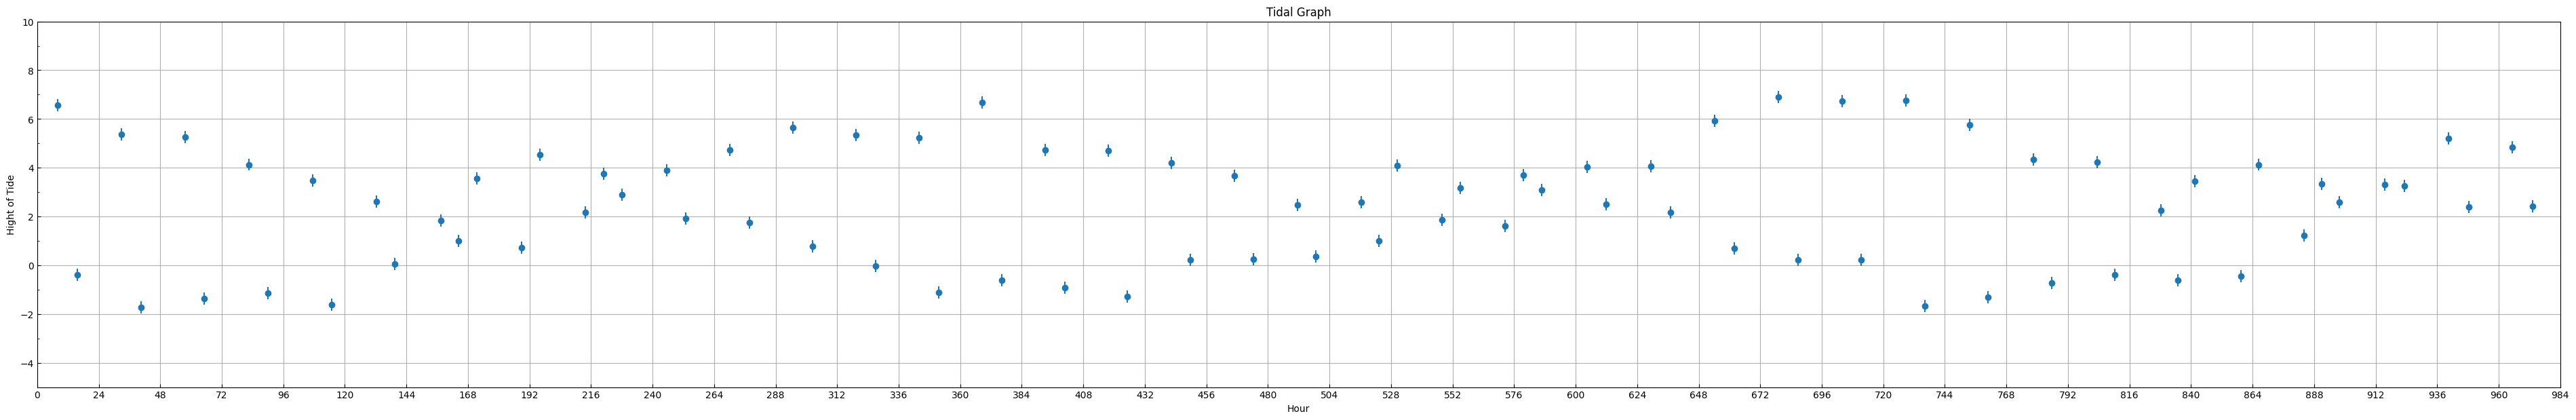

In [6]:
f, ax = plt.subplots(1,1,figsize=(48,7))
ax.xaxis.set_tick_params(which='both',direction='in')
ax.yaxis.set_tick_params(which='both',direction='in')
ax.set_ylim(-5,10)
ax.set_xlim(0,984)
ax.set_xlabel('Hour')
ax.set_ylabel('Hight of Tide')
ax.set_title('Tidal Graph')
ax.set_xticks(np.arange(0,1000, 24),minor=False)
ax.set_yticks(np.arange(-5,10),minor=True)
ax.grid(True)
plt.errorbar(t,heights,yerr=y_err,fmt='o')

In [7]:
mean = (np.mean(heights))
print(heights)

[6.57, -0.39, 5.38, -1.74, 5.26, -1.36, 4.13, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.9, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.2, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.1, 1.87, 3.17, 1.6, 3.71, 3.1, 4.04, 2.49, 4.07, 2.18, 5.93, 0.7, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77, -1.32, 4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41]


In [8]:
y = np.mean(heights) + 3.5*(np.cos(2*np.pi*(t-t[0])/12)) * (np.cos(2*np.pi*(t-t[0])/(24*28)))

In [9]:
yfunc = np.mean(heights) + 3.5*(np.cos(2*np.pi*(u-u[0])/12)) * (np.cos(2*np.pi*(u-u[0])/(24*28)))
print(len(yfunc))
len(u)

984


984

In [10]:
def f_line(u,i,a,b,c,g,c2):
    return i + a * np.cos(b * u + c)  * np.cos(g * u + c2)
params, params_cov = optimize.curve_fit(f_line,u,yfunc,sigma=yerr,p0=[np.mean(heights),3.5,6.28,.1,2*np.pi/12,.9])

d_fit = params[0]
a_fit = params[1]
b_fit = params[2]
c_fit = params[3]
g_fit = params[4]
c2_fit = params[5]

print(d_fit,a_fit,b_fit,c_fit,g_fit)

y_fit = d_fit + (a_fit+.5) * np.cos(b_fit * u-100 ) * np.cos(g_fit * u)

2.478292684016378 3.5000000037707415 6.267449978122295 6.283185306833407 0.5235987748226522


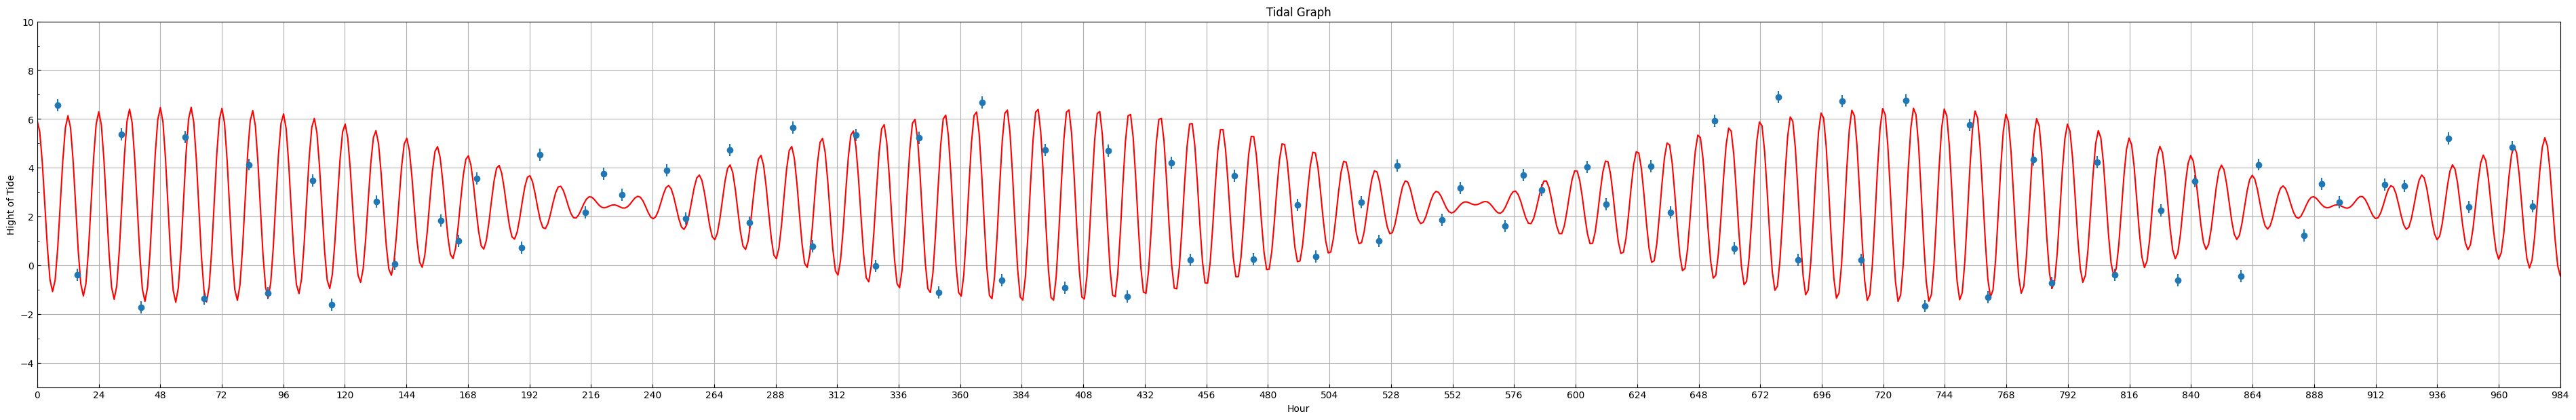

In [11]:
f, ax = plt.subplots(1,1,figsize=(48,7))
ax.xaxis.set_tick_params(which='both',direction='in')
ax.yaxis.set_tick_params(which='both',direction='in')
ax.set_ylim(-5,10)
ax.set_xlim(0,984)
ax.set_xlabel('Hour')
ax.set_ylabel('Hight of Tide')
ax.set_title('Tidal Graph')
ax.set_xticks(np.arange(0,1000, 24),minor=False)
ax.set_yticks(np.arange(-5,10),minor=True)
ax.grid(True)
plt.errorbar(t,heights,yerr=y_err,fmt='o')
#ax.plot(t, y, color='green')
ax.plot(u, y_fit, color='red')

NameError: name 'x' is not defined

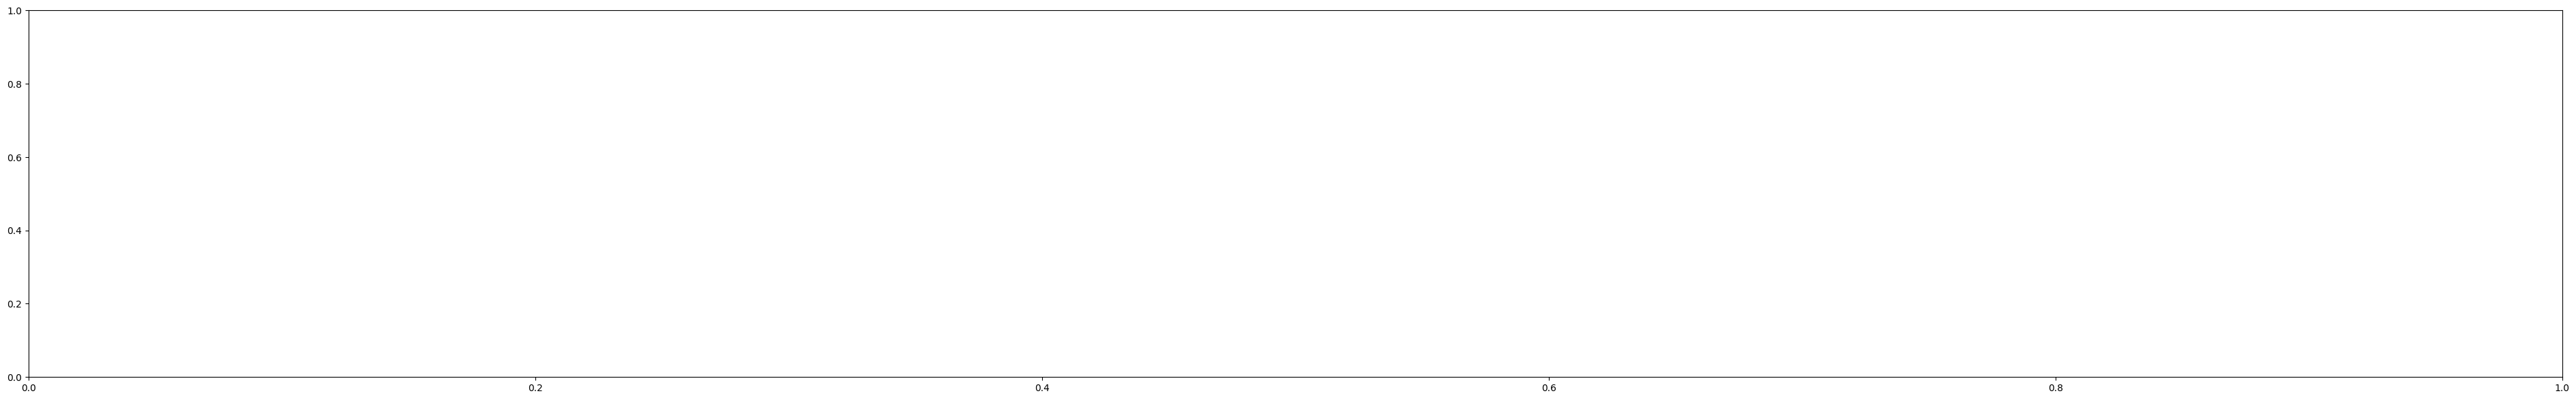

In [12]:
f, ax = plt.subplots(1,1,figsize=(48,7))
plt.plot(x,y_fit_x,label='fit')
plt.errorbar(t,heights,yerr=y_err,fmt='o')

y = np.mean(heights) + 3.5*(np.cos(2*np.pi*(t-t[0])/12)) * (np.cos(2*np.pi*(t-t[0])/(24*28)))

y_fit = d_fit + a_fit * np.cos(b_fit * t + c_fit ) * np.cos(g_fit * t + c2_fit)
u =np.linspace(0,1000,)
plt.plot(u,y_fit)

#print(y)

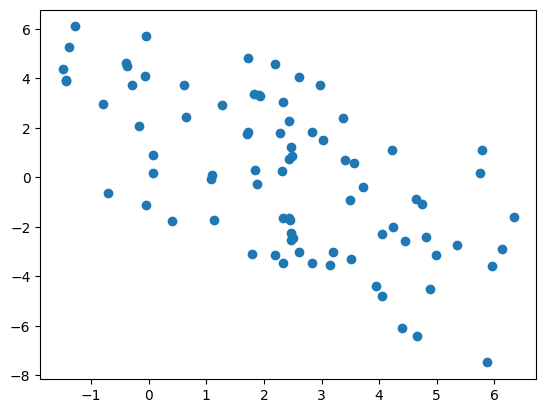

In [18]:
def predict(x):
    y=d_fit + (a_fit+.5) * np.cos(b_fit * x-100 ) * np.cos(g_fit * x)
    return y

y_predicted = predict(t)

y=heights
residuals = y - y_predicted

plt.scatter(y_predicted, residuals)
